In [1]:
get_ipython().run_line_magic('pip', 'install db-dtypes')

Note: you may need to restart the kernel to use updated packages.


In [2]:
get_ipython().run_cell_magic('capture', '', "%logstop\n%logstart -t -r -q ipython_command_log.py global\n\n#- IRONHACKS RESEARCH TRACKING CODE\n#----------------------------------\n# The following code is used to help our research team understand how you \n# our notebook environment. We do not collect any personal information with\n# the following code, it is used to measure when and how often you work on\n# your submission files.\n\nimport os\nfrom datetime import datetime\nimport IPython.core.history as history\n\nha = history.HistoryAccessor()\nha_tail = ha.get_tail(1)\nha_cmd = next(ha_tail)\nsession_id = str(ha_cmd[0])\ncommand_id = str(ha_cmd[1])\ntimestamp = datetime.utcnow().isoformat()\nhistory_line = ','.join([session_id, command_id, timestamp]) + '\\n'\nlogfile = open(os.environ['HOME']+'/ipython_session_log.csv', 'a')\nlogfile.write(history_line)\nlogfile.close()\n")

In [3]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [4]:
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
import csv 
import warnings
warnings.filterwarnings('ignore')

In [6]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [7]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [8]:
query_job = bigquery_client.query(query)
unemployment_data = query_job.to_dataframe()

In [9]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data`
"""

In [10]:
query_job = bigquery_client.query(query)
wage_data = query_job.to_dataframe()

In [11]:
unemployment_data = unemployment_data.drop_duplicates()
unemployment_data.fillna(0, inplace=True)

In [12]:
wage_data = wage_data.drop_duplicates()
wage_data.fillna(0, inplace=True)
wage_data = wage_data.filter(['uu_id', 'average_wage'])

In [13]:
unemployment_data=unemployment_data.filter(['uu_id', 'week_number','total_claims','edu_8th_or_less', 'edu_grades_9_11',
       'edu_hs_grad_equiv', 'edu_post_hs','race_amerindian', 'race_asian', 'race_black','race_white'])

In [14]:
unemployment_data = unemployment_data.sort_values(by=['uu_id','week_number']).reset_index()
unemployment_data = unemployment_data.drop('index', axis=1)

In [15]:
a = pd.merge(unemployment_data, wage_data, on='uu_id')
a

,uu_id,week_number,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white,average_wage
0,001cd9ae23064d7f0fd3cd327c873d8d,31,34,0,0,30,0,0,0,0,34,10484.333333
1,001cd9ae23064d7f0fd3cd327c873d8d,33,10,0,0,0,0,0,0,0,10,10484.333333
2,001cd9ae23064d7f0fd3cd327c873d8d,34,25,0,0,0,0,0,0,0,0,10484.333333
3,001cd9ae23064d7f0fd3cd327c873d8d,35,10,0,0,0,0,0,0,0,0,10484.333333
4,001cd9ae23064d7f0fd3cd327c873d8d,36,10,0,0,0,0,0,0,0,0,10484.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
13972,fec479d0202d6e1e3f051a9ee902ff5d,33,59,0,0,10,49,0,0,0,52,9908.312500
13973,fec479d0202d6e1e3f051a9ee902ff5d,34,34,0,0,0,25,0,0,0,26,9908.312500
13974,fec479d0202d6e1e3f051a9ee902ff5d,35,27,0,0,0,15,0,0,0,19,9908.312500
13975,fec479d0202d6e1e3f051a9ee902ff5d,36,28,0,0,0,18,0,0,0,18,9908.312500


In [16]:
data = unemployment_data[unemployment_data.uu_id == '06c78e49b4daedfeb808c42e58fb25e4']
data

,uu_id,week_number,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,race_amerindian,race_asian,race_black,race_white
238,06c78e49b4daedfeb808c42e58fb25e4,1,17,0,0,0,10,0,0,0,0
239,06c78e49b4daedfeb808c42e58fb25e4,2,17,0,0,0,11,0,0,0,0
240,06c78e49b4daedfeb808c42e58fb25e4,3,18,0,0,0,0,0,0,0,0
241,06c78e49b4daedfeb808c42e58fb25e4,5,23,0,0,0,0,0,0,0,19
242,06c78e49b4daedfeb808c42e58fb25e4,6,15,0,0,0,0,0,0,0,0
243,06c78e49b4daedfeb808c42e58fb25e4,7,21,0,0,0,0,0,0,0,0
244,06c78e49b4daedfeb808c42e58fb25e4,8,17,0,0,0,0,0,0,0,0
245,06c78e49b4daedfeb808c42e58fb25e4,9,45,0,0,0,0,0,0,23,22
246,06c78e49b4daedfeb808c42e58fb25e4,10,19,0,0,0,0,0,0,0,0
247,06c78e49b4daedfeb808c42e58fb25e4,11,22,0,0,0,0,0,0,0,0


In [17]:
unemployment_data.uu_id.unique()[:20]

array(['001cd9ae23064d7f0fd3cd327c873d8d',
       '005be9532fd717dc36d4be318fd9ad25',
       '007c1caccff1fbb3a0b8a10790f77141',
       '009683350b175edfc6414d664e4ba873',
       '00f962ce727b8dbbf20925abd5a253dd',
       '02a7b845ab6b3fc2c09a50cdc486db2a',
       '03ba3a9a63be1a5423457246f2846292',
       '050a624d618a68e43fe31189909c644f',
       '05298117cbe0fd69f04f89c83aaac091',
       '05f47cc80d60a67d61e891e2b90c2045',
       '06c78e49b4daedfeb808c42e58fb25e4',
       '06e492b4f29d153af26c659d1f7da2a1',
       '07306ce64b3496b7955efaaf7509d73c',
       '074f501122885ab9aef5e9d07004209d',
       '09fbf26479f644ad33186ec51a90d65d',
       '0abaea6bbc30d7cf8dbacc64727e7091',
       '0ad94f09274e2c9cb0ef5cb77eb334b4',
       '0aed17ab54d56c6651d331418e8db6be',
       '0bdc0df962a3c10541c2aa5220ded58b',
       '0d165590afad07ce71727d690f4aad80'], dtype=object)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = unemployment_data[unemployment_data.uu_id == 'ffbc87dc4bde6828daff6ad43e12db4a']
y = data['total_claims']
X = data.drop(['total_claims','uu_id'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

regr = RandomForestRegressor(n_estimators = 1000, max_depth = 5, random_state = 101)
regr.fit(X_train, y_train.values.ravel())
predictions = regr.predict(X_test)

result = X_test
result['total_claims'] = y_test
result['prediction'] = predictions.tolist()
result = result.sort_values('week_number')
result_format = result[['week_number','total_claims', 'prediction']]

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, result['prediction'] ))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, result['prediction'] ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, result['prediction'] )))
result

In [19]:
x_axis = result.week_number

NameError: name 'result' is not defined

In [20]:
# Build scatterplot
plt.plot(x_axis, result['total_claims'], c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.plot(x_axis, result['prediction'], c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

NameError: name 'x_axis' is not defined

Text(0, 0.5, 'Claims')

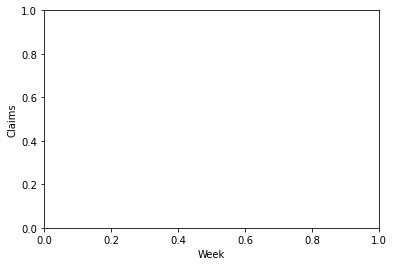

In [21]:
plt.xlabel('Week')
plt.ylabel('Claims')

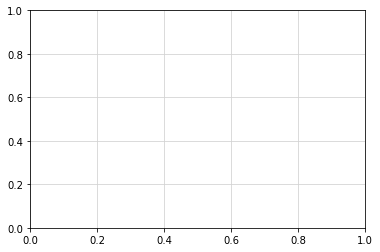

In [22]:
plt.grid(color = '#D3D3D3', linestyle = 'solid')

No handles with labels found to put in legend.


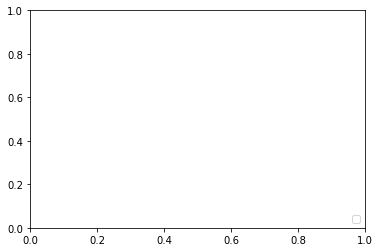

In [23]:
plt.legend(loc = 'lower right')

In [24]:
plt.show()

In [25]:
def predict_claim(uuid):
    data = unemployment_data[unemployment_data.uu_id == uuid]
    y = data['total_claims']
    X = data.drop(['total_claims','uu_id'], axis = 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

    regr = RandomForestRegressor(n_estimators = 1000, max_depth = 5, random_state = 101)
    regr.fit(X_train, y_train.values.ravel())
    predictions = regr.predict(X_test)

    result = X_test
    result['total_claims'] = y_test
    result['prediction'] = predictions.tolist()
    result = result.sort_values('week_number')
    result = result[['week_number','total_claims', 'prediction']]
    
    lm = LinearRegression()
    lm.fit(np.array(result['week_number']).reshape(-1,1), np.array(result['total_claims']))

    intercept = lm.intercept_
    slope = lm.coef_
    
    return 40*slope + intercept

In [26]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [27]:
query_job = bigquery_client.query(query)
prediction_list = query_job.to_dataframe()

In [28]:
uuids = prediction_list.uu_id.tolist()

In [29]:
len(uuids)

525

In [30]:
data_count = unemployment_data.uu_id.value_counts().to_dict()
print(len(data_count))

525


In [31]:
lessthanten = []
for uuid, cnt in data_count.items():
    if cnt <10:
        lessthanten.append(uuid)
print(len(lessthanten))

21


In [32]:
for i in lessthanten:
    uuids.remove(i)

In [33]:
rows = []
for uuid in uuids:
    rows.append([uuid, 40, int(predict_claim(uuid))])

In [34]:
for uuid in lessthanten:
    rows.append([uuid, 40, int(unemployment_data.groupby('uu_id').median().total_claims[uuid])])    

In [35]:
len(rows)

525

In [36]:
filename = 'submission_prediction_output.csv'
fields = ['uu_id', 'week_number', 'total_claims']

In [37]:
with open(filename, 'w') as csvfile: 
     
    csvwriter = csv.writer(csvfile) 

    csvwriter.writerow(fields) 

    csvwriter.writerows(rows)

In [38]:
rows = []
for uuid in uuids:
    rows.append([uuid, 41, int(predict_claim(uuid))])

In [39]:
for uuid in lessthanten:
    rows.append([uuid, 41, int(unemployment_data.groupby('uu_id').median().total_claims[uuid])])    

In [40]:
len(rows)

525

In [41]:
filename = 'submission_prediction_output.csv'
fields = ['uu_id', 'week_number', 'total_claims']

In [42]:
with open(filename, 'w') as csvfile: 
     
    csvwriter = csv.writer(csvfile) 

    csvwriter.writerow(fields) 

    csvwriter.writerows(rows)